In [23]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.11.0'

In [2]:
keras.__version__

'2.11.0'

## Building the image classifier using the Sequential API

Fashion MNIST is the drop-in replacement of MNIST.

same format of MNIST - 70000 grayscale images of 28 x 28 pixels each, with 10 classes

The image represents the fashion items which is more diverse and the significantly more challenging than MNIST.

Keras provides some utility  function  to fetch and load common datassets - MNIST, Fashion MNIST, California housing datasets.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 15s 3us/step


When loasing MNIST or Fashion MNIST using keras other than Scikit-Learn,

Every image is represented as a 28 x 28 array rather than a 1D array of size 784. 

The pixel intensity is repesented as integers (from 0 to 225) rather than floats (from 0.0 to 255.0).

In [4]:
# shape of the training set
X_train_full.shape

(60000, 28, 28)

In [5]:
# data type of the training set
X_train_full.dtype

dtype('uint8')

In [60]:
X_test.shape

(10000, 28, 28)

In [14]:
# creating validation set. 
# we will be training the dataset using Gradient Descent, we must scale input features.
# scale the pixel intensity down to 0 to 1 range by dividing them by 255.0

X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
# list of class names 
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [15]:
y_train[0]

4

In [16]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt', 'Sneaker','Bag', 'Ankle boot']

In [17]:
class_names[y_train[0]]

'Coat'

In [27]:
model = keras.models.Sequential()
# Sequential model is simplest model in keras for neural network. 
# composed of single stack of layers connected sequentially.

In [28]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
# builds the first layer and adds it to the model.
# Flatten layer converts each input image into a 1D array.
# input X is computed to X.reshape(-1,1)
# since it is the first layer, specify the shape of the instances.
# the shape of the weight matrix depends on the number of inputs, hence specify input_shape

In [29]:
model.add(keras.layers.Dense(300, activation='relu'))
# 1st Dense hidden layer with 300 neurons.
# with ReLU activation function.
# Each dense layer manages its own weight matrix and a bias vector.

In [30]:
model.add(keras.layers.Dense(100, activation='relu'))
# 2nd Dense hidden layer with 100 neurons and ReLU activation function


In [31]:
model.add(keras.layers.Dense(10, activation='softmax'))
# finally output layer with 10 neurons (one per class) and softmax activation finction

In [25]:
# The above steps can be done in only one step by passing a list of layers 
# when creating the Sequential model

model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
])

In [32]:
# model's summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [33]:
# model's list of layers, to fetch a layer by its index
model.layers

In [35]:
hidden1 = model.layers[1]
hidden1.name

'dense_6'

In [36]:
model.get_layer('dense_6') is hidden1

True

In [37]:
# assessing all the parameters
weights, biases = hidden1.get_weights()
weights
# initial weights are randomly initialized

array([[ 0.03161334,  0.03979832, -0.03387386, ...,  0.02244543,
        -0.00547032, -0.01016739],
       [-0.06544443, -0.02397195,  0.06028651, ..., -0.03685997,
         0.03668644, -0.07196315],
       [-0.05689935, -0.03380556,  0.0003892 , ..., -0.01105389,
         0.00153438, -0.04974872],
       ...,
       [-0.06752601, -0.05799883,  0.06473157, ..., -0.01900271,
        -0.03953276, -0.06798254],
       [ 0.00816782,  0.06251548, -0.05744844, ...,  0.01444934,
         0.03193924, -0.02957613],
       [ 0.01011746, -0.01210564,  0.02737038, ..., -0.05189433,
        -0.02765539,  0.05080934]], dtype=float32)

In [38]:
weights.shape

(784, 300)

In [39]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [40]:
biases.shape

(300,)

In [41]:
# kernal is another name for the matrix of connection weights
# for different weight initialization mode, you can use kernal_initializer 
# or bias_initializer when creating the layer

In [43]:
# Compling the model, spcifying the loss function and optimizer to use.
# can also specify list of extra metrics
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics=['accuracy'])

In [44]:
# loss='sparse_categotrical_crossentropy' =~  kesar.losses.sparse_categorical_crossentropy
# optimizer = 'sgd' =~ keras.optimizer.SGD()
# metrics = ['accuracy'] =~ [keras.metrics.sparse_categorical_accuracy]

In [45]:
# we have sparse labels i.e there is just a target class index from 0 to 9 in this case, hence we use sparse_categorical_crossentropy
# if we had one hot encoder , then we would need to use the 'categorical_crossentropy' as a loss
# if we had binary classification (with one or more binary labels), then we would use 'sigmoid' insted of softmax at the output layer
# and 'binary_crossentropy' as loss

In [46]:
# keras.utils.to_categorical() function to convert sparse label to one-hot encoder vector
# np.argmax(one-hot, axis=1)

In [47]:
# optimizer = 'sgd' sets the learning rate to its default value of 0.01
# to change it use keras.optimizer.SGD(lr= ???)

In [48]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7217 - accuracy: 0.7587 - val_loss: 0.5291 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4949 - accuracy: 0.8272 - val_loss: 0.4688 - val_accuracy: 0.8364
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4489 - accuracy: 0.8413 - val_loss: 0.4548 - val_accuracy: 0.8416
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4207 - accuracy: 0.8524 - val_loss: 0.4109 - val_accuracy: 0.8596
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4006 - accuracy: 0.8599 - val_loss: 0.3997 - val_accuracy: 0.8626
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3837 - accuracy: 0.8642 - val_loss: 0.3734 - val_accuracy: 0.8706
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3688 - accuracy: 0.8696 - val_loss: 0.3790 - val_accuracy:

In [49]:
# can also use validation_split = 0.1
# class_weights when calling fit(), will give a large weight to underrepresented classes
# lower weight to overrepresented classes. used while computing loss.
# sample_weight for per-instance weights, used to distinguish between expert and crowd labelling.
# if both class_weight and sample_weight are given, keras will multuiply them.
# also provide sample weights for validation data( 3rd item in the tuple)

In [50]:
# fit() method returns
# 1. History object containing training parameters (history.params)
# 2. list of epochs it went through (history.epoch)
# 3. dict of history.history containing the loss and extra metrics it measured at the end of each epoch
# onthe training and validation set

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

(0.0, 1.0)

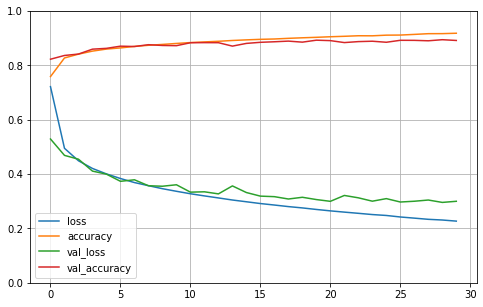

In [52]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [56]:
metrics_ = pd.DataFrame(history.history)
metrics_.head()

,loss,accuracy,val_loss,val_accuracy
0,0.721675,0.758709,0.529074,0.8226
1,0.494856,0.827200,0.468806,0.8364
2,0.448946,0.841273,0.454752,0.8416
3,0.420697,0.852400,0.410947,0.8596
4,0.400610,0.859927,0.399680,0.8626


In [57]:
# validation error is computed at the end of each epoch.
# training error is computed using a running mean during each epoch.
# validationn curves are close to the training curves, which measns there is not too much overfitting.


In [58]:
# if performance of the model is not satisfied, then you have to tune the hyperparameters
# first, check the learning rate
# try another optimizer and always retune the lr after changing any hyperparameter
# if the performance is still not great, then try tuneing model hyperparameters 
# such as the number of layers, the number of neurons per layer, and the type of activation functions to use for each hidden layers
# you can also tune other hyperparameters, such as batch_size. default value is 32 in fit() method

In [64]:
# now evaluate the model for test dataset to estimate the generalization error before you deploy the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 894us/step - loss: 76.0104 - accuracy: 0.8343


[76.01040649414062, 0.8342999815940857]

In [63]:
y_test.shape

(10000,)